Random Forest Model Accuracy: 0.88
Logistic Regression Model Accuracy: 0.83


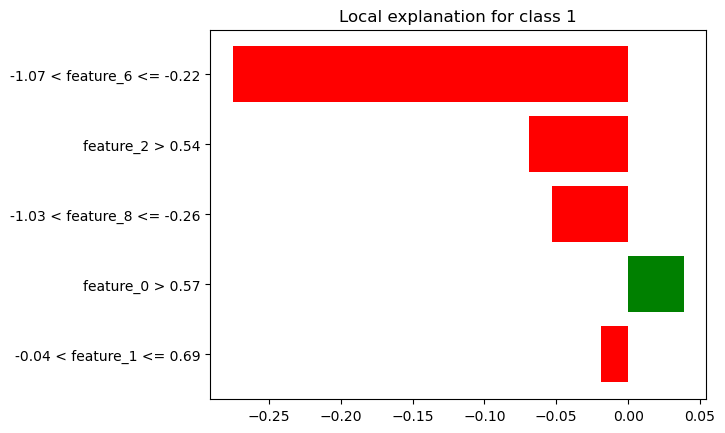

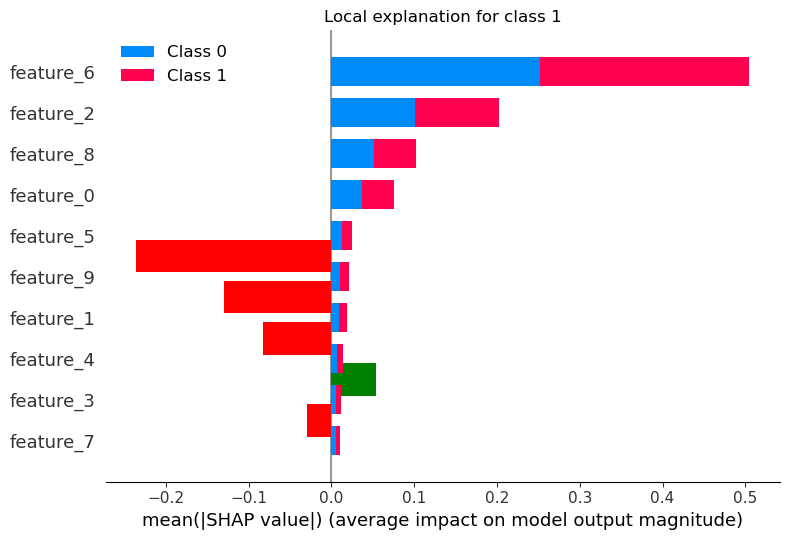

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LogisticRegression(random_state=42)

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lime import lime_tabular
import shap
from pdpbox import pdp
from pdpbox import info_plots
from sklearn.datasets import make_classification
import pandas as pd

# Generate a random n-class classification problem.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy}")

# Create a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Model Accuracy: {accuracy_logreg}")

# Select a sample for local explanation
sample_idx = 0
sample = X_test[sample_idx]

# Create a LIME explainer for the random forest model
explainer_rf = lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Generate local explanation for the selected sample using LIME
exp_rf = explainer_rf.explain_instance(sample, clf.predict_proba, num_features=5)

# Plot the LIME explanation for the random forest model
exp_rf.as_pyplot_figure()

# Create a LIME explainer for the logistic regression model
explainer_logreg = lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Generate local explanation for the selected sample using LIME
exp_logreg = explainer_logreg.explain_instance(sample, logreg.predict_proba, num_features=5)

# Plot the LIME explanation for the logistic regression model
exp_logreg.as_pyplot_figure()

# Create a SHAP explainer for the random forest model
shap_explainer_rf = shap.TreeExplainer(clf)

# Calculate SHAP values for the entire test set
shap_values_rf = shap_explainer_rf.shap_values(X_test)

# Summary plot for global explanation using SHAP for the random forest model
shap.summary_plot(shap_values_rf, X_test, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Create a SHAP explainer for the logistic regression model
shap_explainer_logreg = shap.Explainer(logreg)

# Calculate SHAP values for the entire test set
shap_values_logreg = shap_explainer_logreg.shap_values(X_test)

# Summary plot for global explanation using SHAP for the logistic regression model
shap.summary_plot(shap_values_logreg, X_test, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# PDP for a specific feature for the logistic regression model
pdp_feature_logreg = pdp.pdp_isolate(model=logreg, dataset=pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])]), model_features=[f'feature_{i}' for i in range(X_test.shape[1])], feature='feature_0')

# PDP plot for the feature for the logistic regression model
pdp.pdp_plot(pdp_feature_logreg, 'feature_0')

# ICE plot for the same feature for the logistic regression model
pdp.pdp_interact_plot(pdp_interact_out=pdp_feature_logreg, feature_names=['feature_0'])